In [1]:
%matplotlib notebook

/Users/guyer/anaconda/envs/parallel2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from matplotlib import pyplot as plt

In [3]:
import datreant.core as dtr

In [4]:
import fipy as fp

In [118]:
data = dtr.Treant("a8602333-9c5f-4779-a2cc-04d9ddfc1844")

In [119]:
data.categories['commit']

u'9d5ab6a804aa7326f7283bfd3cec056eebb44f51'

In [120]:
print data.categories['diff']

diff --git a/problemIII-2.py b/problemIII-2.py
index 68b4af7..9077432 100644
--- a/problemIII-2.py
+++ b/problemIII-2.py
@@ -47,16 +47,7 @@ k = 0.09
 epsilon = 9.
 
 
-# Boundary condition is stipulated as $\nabla c \cdot \hat{n} = 0$, which is not no-flux. Constraining c.faceGrad to zero seems to do nothing, so we impose a flux constraint on the remainder of the flux (assuming that $\nabla^3 c \cdot \hat{n} = 0$). Thus,
-# \begin{align*}
-# \vec{J} &= M\nabla\left(\frac{\partial^2 f_{chem}}{\partial c^2}\nabla c - \kappa \nabla^2 c + k \Phi\right) 
-# \\
-# &\approx M\nabla\left(k \Phi\right) 
-# \end{align*}
-# on exterior faces.
-
-c_BC = (M*k*Phi.faceGrad*mesh.exteriorFaces).divergence
-ceq = fp.TransientTerm(var=c) == fp.DiffusionTerm(coeff=M, var=psi) + c_BC
+ceq = fp.TransientTerm(var=c) == fp.DiffusionTerm(coeff=M, var=psi)
 
 fchem = rho * (c - calpha)**2 * (cbeta - c)**2
 felec = k * c * Phi / 2.



In [135]:
data.draw()

a8602333-9c5f-4779-a2cc-04d9ddfc1844/
 +-- t=40.0.tar.gz
 +-- t=10.0.tar.gz
 +-- t=20.0.tar.gz
 +-- t=400.0.tar.gz
 +-- stats.npy
 +-- t=200.0.tar.gz
 +-- t=5.0.tar.gz
 +-- t=100.0.tar.gz
 +-- Treant.14e0d455-4ee2-45b5-9b41-5fbfa4a05324.json


<IPython.core.display.Javascript object>


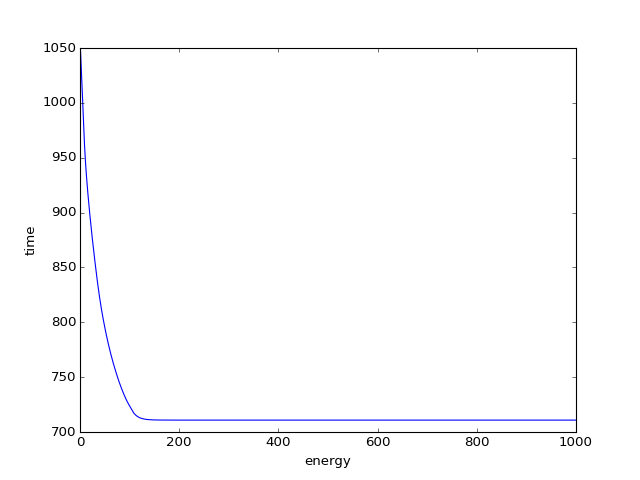

In [157]:
stats = fp.numerix.load(data['stats.npy'].abspath)

plt.figure()
plt.plot(stats['time'], stats['energy'])
plt.xlabel('energy')
plt.ylabel('time')

In [155]:
for t in data.glob("t=*.tar.gz"):
    print t.abspath

/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=10.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=100.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=1000.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=20.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=200.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=40.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=400.0.tar.gz
/Users/guyer/Documents/research/FiPy/hackathonIII/a8602333-9c5f-4779-a2cc-04d9ddfc1844/t=5.0.tar.gz


<IPython.core.display.Javascript object>


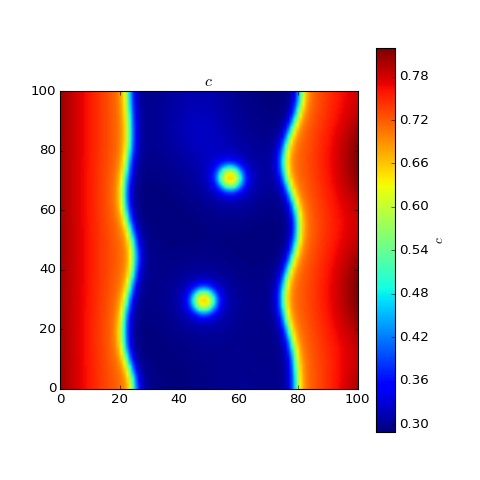

<IPython.core.display.Javascript object>


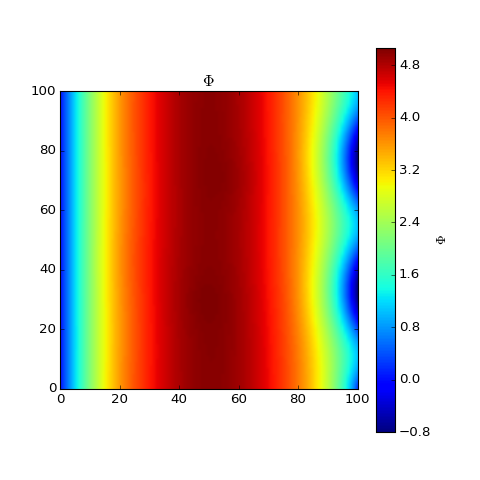

In [158]:
c, Phi = fp.dump.read(filename=data["t=100.0.tar.gz"].abspath)

fp.Viewer(vars=(c, Phi)).plot()

In [87]:
print c.min(), c.max()

0.00571954211079 0.0057195421108


In [117]:
5. * .3**2 * .7**2 * 100**2

2204.9999999999995